In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('laptop_data.csv')
df.shape

(1303, 12)

In [3]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [5]:
df['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [6]:
df['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [7]:
df['Inches'].unique()

array([13.3, 15.6, 15.4, 14. , 12. , 11.6, 17.3, 10.1, 13.5, 12.5, 13. ,
       18.4, 13.9, 12.3, 17. , 15. , 14.1, 11.3])

In [8]:
df['ScreenResolution'].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [9]:
df['IPS Panel'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS Panel' in x else 0)

In [10]:
df['IPS Panel'].value_counts()

IPS Panel
0    938
1    365
Name: count, dtype: int64

In [11]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [12]:
df['Touchscreen'].value_counts()

Touchscreen
0    1111
1     192
Name: count, dtype: int64

In [13]:
new_df= df['ScreenResolution'].str.split('x')
new_df

0               [IPS Panel Retina Display 2560, 1600]
1                                         [1440, 900]
2                                [Full HD 1920, 1080]
3               [IPS Panel Retina Display 2880, 1800]
4               [IPS Panel Retina Display 2560, 1600]
                            ...                      
1298     [IPS Panel Full HD / Touchscreen 1920, 1080]
1299    [IPS Panel Quad HD+ / Touchscreen 3200, 1800]
1300                                      [1366, 768]
1301                                      [1366, 768]
1302                                      [1366, 768]
Name: ScreenResolution, Length: 1303, dtype: object

In [14]:
df['x_res'] = new_df.str.get(0)
df['y_res'] = new_df.str.get(1)

In [15]:
df['x_res'] = df['x_res'].str.findall(r'\d+').str.get(0)

In [16]:
df['x_res'] = df['x_res'].astype(int) 
df['y_res'] = df['y_res'].astype(int)

In [17]:
df['price per inches'] = (((df['x_res']**2) + (df['y_res']**2))**0.5)/df['Inches']

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
 12  IPS Panel         1303 non-null   int64  
 13  Touchscreen       1303 non-null   int64  
 14  x_res             1303 non-null   int32  
 15  y_res             1303 non-null   int32  
 16  price per inches  1303 non-null   float64


In [19]:
df['Cpu'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [20]:
df['Cpu'] = df['Cpu'].str.split(" ").str.slice(0,3).str.join(' ')

In [21]:
df['Cpu'].value_counts()

Cpu
Intel Core i7               527
Intel Core i5               423
Intel Core i3               136
Intel Celeron Dual           80
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
Intel Celeron Quad            8
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
AMD A8-Series 7410            4
Intel Atom x5-Z8550           4
Intel Pentium Dual            3
AMD A9-Series 9410            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD A10-Series 9620P          2
Intel Atom X5-Z8350           2
AMD E-Series E2-9000e         2
Intel Xeon E3-1535M           2
Intel Xeon E3-1505M           2
AMD E-Series 7110             2
AMD A10-Series 9600P          2
AMD A6-Series A6-9220         2
AMD A10-Series A10-9620P      2
AMD Ryzen 1600                1
Intel Atom x5-Z8300           1
AMD E-Series E2-6110          1
AMD FX 9830P                  1
AMD E-Series E2-9000          1
AMD 

In [22]:
df.iloc[142,:]

Unnamed: 0                                  142
Company                                  Lenovo
TypeName                                 Gaming
Inches                                     15.6
ScreenResolution    IPS Panel Full HD 1920x1080
Cpu                               Intel Core i7
Ram                                         8GB
Memory                                256GB SSD
Gpu                    Nvidia GeForce GTX 1050M
OpSys                                     No OS
Weight                                    2.4kg
Price                                  46300.32
IPS Panel                                     1
Touchscreen                                   0
x_res                                      1920
y_res                                      1080
price per inches                     141.211998
Name: 142, dtype: object

In [23]:
def processer(x):
    
    if x == 'Intel Core i7' or x == 'Intel Core i5' or x == 'Intel Core i3':
        
        return x
    else:
        if x.split(' ')[0] == 'Intel':
            
            return 'other Intel Processer'
        else:
            return "AMD Processer"

In [24]:
df['Cpu'] = df['Cpu'].apply(processer)

In [25]:
df['Cpu']

0               Intel Core i5
1               Intel Core i5
2               Intel Core i5
3               Intel Core i7
4               Intel Core i5
                ...          
1298            Intel Core i7
1299            Intel Core i7
1300    other Intel Processer
1301            Intel Core i7
1302    other Intel Processer
Name: Cpu, Length: 1303, dtype: object

In [26]:
df['Cpu'].value_counts()

Cpu
Intel Core i7            527
Intel Core i5            423
other Intel Processer    154
Intel Core i3            136
AMD Processer             63
Name: count, dtype: int64

In [27]:
df['Ram'].value_counts()

Ram
8GB     619
4GB     375
16GB    200
6GB      41
12GB     25
2GB      22
32GB     17
24GB      3
64GB      1
Name: count, dtype: int64

In [28]:
df['Ram'] = df['Ram'].str.replace('GB',' ')

In [29]:
df['Ram'] = df['Ram'].astype(int)

In [30]:
df['Ram']

0        8
1        8
2        8
3       16
4        8
        ..
1298     4
1299    16
1300     2
1301     6
1302     4
Name: Ram, Length: 1303, dtype: int32

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int32  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
 12  IPS Panel         1303 non-null   int64  
 13  Touchscreen       1303 non-null   int64  
 14  x_res             1303 non-null   int32  
 15  y_res             1303 non-null   int32  
 16  price per inches  1303 non-null   float64


In [32]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [33]:
df['Gpu']=df['Gpu'].str.split(" ").str.slice(0,2).str.join(" ")

In [34]:
df['Gpu'].value_counts()

Gpu
Intel HD          639
Nvidia GeForce    368
AMD Radeon        173
Intel UHD          68
Nvidia Quadro      31
Intel Iris         14
AMD FirePro         5
AMD R4              1
Nvidia GTX          1
AMD R17M-M1-70      1
Intel Graphics      1
ARM Mali            1
Name: count, dtype: int64

In [35]:
def Gpu_set(x):
    if x.split()[0]== "Intel":
        return "Intel_Graphics"
    else:
        if x.split()[0] == "AMD":
            return "AMD_Graphics"
        else:
            if x == "Nvidia":
                return "Nvidia_Graphics"
            else:
                return "Other_Graphics"

In [36]:
df['Gpu'] = df['Gpu'].apply(Gpu_set)

In [37]:
df['Gpu'].value_counts()

Gpu
Intel_Graphics    722
Other_Graphics    401
AMD_Graphics      180
Name: count, dtype: int64

In [38]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [39]:
df['OpSys'] = df['OpSys'].str.replace('Mac OS','macOS')

In [40]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
macOS X            8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [41]:
def opsys(x):
    
    if x.split(' ')[0] == 'Windows':
        return 'Windows'
    else:
        if x.split(' ')[0] == 'macOS':
            return 'MacOS'
        else:
            return 'Other_opsys'

In [42]:
df['OpSys'] = df['OpSys'].apply(opsys)


In [43]:
df['OpSys'].value_counts()

OpSys
Windows        1125
Other_opsys     157
MacOS            21
Name: count, dtype: int64

In [44]:
df['Weight'].unique()

array(['1.37kg', '1.34kg', '1.86kg', '1.83kg', '2.1kg', '2.04kg', '1.3kg',
       '1.6kg', '2.2kg', '0.92kg', '1.22kg', '0.98kg', '2.5kg', '1.62kg',
       '1.91kg', '2.3kg', '1.35kg', '1.88kg', '1.89kg', '1.65kg',
       '2.71kg', '1.2kg', '1.44kg', '2.8kg', '2kg', '2.65kg', '2.77kg',
       '3.2kg', '0.69kg', '1.49kg', '2.4kg', '2.13kg', '2.43kg', '1.7kg',
       '1.4kg', '1.8kg', '1.9kg', '3kg', '1.252kg', '2.7kg', '2.02kg',
       '1.63kg', '1.96kg', '1.21kg', '2.45kg', '1.25kg', '1.5kg',
       '2.62kg', '1.38kg', '1.58kg', '1.85kg', '1.23kg', '1.26kg',
       '2.16kg', '2.36kg', '2.05kg', '1.32kg', '1.75kg', '0.97kg',
       '2.9kg', '2.56kg', '1.48kg', '1.74kg', '1.1kg', '1.56kg', '2.03kg',
       '1.05kg', '4.4kg', '1.90kg', '1.29kg', '2.0kg', '1.95kg', '2.06kg',
       '1.12kg', '1.42kg', '3.49kg', '3.35kg', '2.23kg', '4.42kg',
       '2.69kg', '2.37kg', '4.7kg', '3.6kg', '2.08kg', '4.3kg', '1.68kg',
       '1.41kg', '4.14kg', '2.18kg', '2.24kg', '2.67kg', '2.14kg',
       '1.

In [45]:
df['Weight'] = df['Weight'].str.replace('kg',' ')

In [46]:
df['Weight'] = df['Weight'].astype(float)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int32  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float64
 11  Price             1303 non-null   float64
 12  IPS Panel         1303 non-null   int64  
 13  Touchscreen       1303 non-null   int64  
 14  x_res             1303 non-null   int32  
 15  y_res             1303 non-null   int32  
 16  price per inches  1303 non-null   float64


In [48]:
df['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [49]:
df['Memory'] = df['Memory'].str.replace('GB',' ')

In [50]:
df['Memory'] = df['Memory'].str.replace('TB','000')

In [51]:
df['Memory'] = df['Memory'].str.replace('.0000','000')

In [52]:
df['Memory']

0                 128  SSD
1       128  Flash Storage
2                 256  SSD
3                 512  SSD
4                 256  SSD
               ...        
1298              128  SSD
1299              512  SSD
1300     64  Flash Storage
1301              1000 HDD
1302              500  HDD
Name: Memory, Length: 1303, dtype: object

In [53]:
df2 = df['Memory'].str.split("+", n=1, expand=True)
df2 

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


In [54]:
df2['first'] =df2[0]
df2['second'] = df2[1]

In [55]:
df2

,0,1,first,second
0,128 SSD,None,128 SSD,None
1,128 Flash Storage,None,128 Flash Storage,None
2,256 SSD,None,256 SSD,None
3,512 SSD,None,512 SSD,None
4,256 SSD,None,256 SSD,None
...,...,...,...,...
1298,128 SSD,None,128 SSD,None
1299,512 SSD,None,512 SSD,None
1300,64 Flash Storage,None,64 Flash Storage,None
1301,1000 HDD,None,1000 HDD,None


In [56]:
df2['second'].fillna('0',inplace=True)

In [57]:
df2

,0,1,first,second
0,128 SSD,None,128 SSD,0
1,128 Flash Storage,None,128 Flash Storage,0
2,256 SSD,None,256 SSD,0
3,512 SSD,None,512 SSD,0
4,256 SSD,None,256 SSD,0
...,...,...,...,...
1298,128 SSD,None,128 SSD,0
1299,512 SSD,None,512 SSD,0
1300,64 Flash Storage,None,64 Flash Storage,0
1301,1000 HDD,None,1000 HDD,0


In [58]:
df2['l1ssd'] = df2['first'].apply(lambda x: 1 if 'SSD' in x else 0)

In [59]:
df2['l1hdd'] = df2['first'].apply(lambda x: 1 if 'HDD' in x else 0)

In [60]:
df2['l1Flash Storage'] = df2['first'].apply(lambda x: 1 if 'Flash Storage' in x else 0)

In [61]:
df2['l1Hybrid'] = df2['first'].apply(lambda x: 1 if 'Hybrid' in x else 0)

In [62]:
df2['l2ssd'] = df2['second'].apply(lambda x: 1 if 'SSD' in x else 0)

In [63]:
df2['l2hdd'] = df2['second'].apply(lambda x: 1 if 'HDD' in x else 0)

In [64]:
df2['l2Flash Storage'] = df2['second'].apply(lambda x: 1 if 'Flash Storage' in x else 0)

In [65]:
df2['l2Hybrid'] = df2['second'].apply(lambda x: 1 if 'Hybrid' in x else 0)

In [66]:
df2['first'] = df2['first'].str.findall(r'\d+').str.get(0)

In [67]:
df2['first'] = df2['first'].astype(int)

In [68]:
df2['second'] = df2['second'].str.findall(r'\d+').str.get(0)

In [69]:
df2['second'] = df2['second'].astype(int)

In [70]:
df2

,0,1,first,second,l1ssd,l1hdd,l1Flash Storage,l1Hybrid,l2ssd,l2hdd,l2Flash Storage,l2Hybrid
0,128 SSD,None,128,0,1,0,0,0,0,0,0,0
1,128 Flash Storage,None,128,0,0,0,1,0,0,0,0,0
2,256 SSD,None,256,0,1,0,0,0,0,0,0,0
3,512 SSD,None,512,0,1,0,0,0,0,0,0,0
4,256 SSD,None,256,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,128 SSD,None,128,0,1,0,0,0,0,0,0,0
1299,512 SSD,None,512,0,1,0,0,0,0,0,0,0
1300,64 Flash Storage,None,64,0,0,0,1,0,0,0,0,0
1301,1000 HDD,None,1000,0,0,1,0,0,0,0,0,0


In [71]:
df['SSD'] = df2['first']*df2['l1ssd'] + df2['second']*df2['l2ssd']

In [72]:
df['HDD'] = df2['first']*df2['l1hdd'] + df2['second']*df2['l2hdd']

In [73]:
df['Flash Storage'] = df2['first']*df2['l1Flash Storage'] + df2['second']*df2['l2Flash Storage']

In [74]:
df['Hybrid'] = df2['first']*df2['l1Hybrid'] + df2['second']*df2['l2Hybrid']

In [75]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,...,Price,IPS Panel,Touchscreen,x_res,y_res,price per inches,SSD,HDD,Flash Storage,Hybrid
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8,128 SSD,Intel_Graphics,MacOS,...,71378.6832,1,0,2560,1600,226.983005,128,0,0,0
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5,8,128 Flash Storage,Intel_Graphics,MacOS,...,47895.5232,0,0,1440,900,127.677940,0,0,128,0
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5,8,256 SSD,Intel_Graphics,Other_opsys,...,30636.0000,0,0,1920,1080,141.211998,256,0,0,0
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7,16,512 SSD,AMD_Graphics,MacOS,...,135195.3360,1,0,2880,1800,220.534624,512,0,0,0
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8,256 SSD,Intel_Graphics,MacOS,...,96095.8080,1,0,2560,1600,226.983005,256,0,0,0


In [76]:
df.drop(columns=['Memory'], inplace = True)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int32  
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  IPS Panel         1303 non-null   int64  
 12  Touchscreen       1303 non-null   int64  
 13  x_res             1303 non-null   int32  
 14  y_res             1303 non-null   int32  
 15  price per inches  1303 non-null   float64
 16  SSD               1303 non-null   int64  


In [78]:
df.drop(columns=['Unnamed: 0','Inches','ScreenResolution','x_res','y_res','Flash Storage','Hybrid'], inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_10848\834922981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

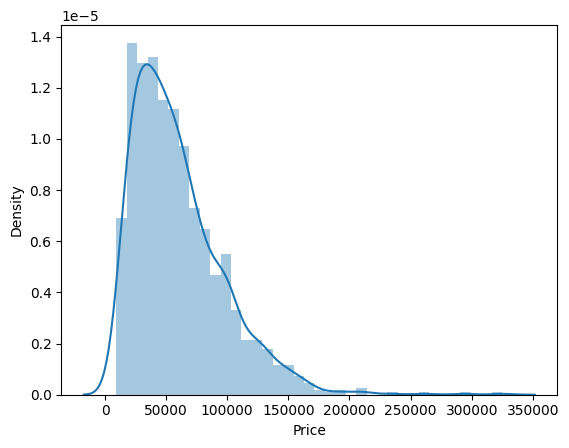

In [79]:
sns.distplot(df['Price'])

C:\Users\HP\AppData\Local\Temp\ipykernel_10848\3556049916.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

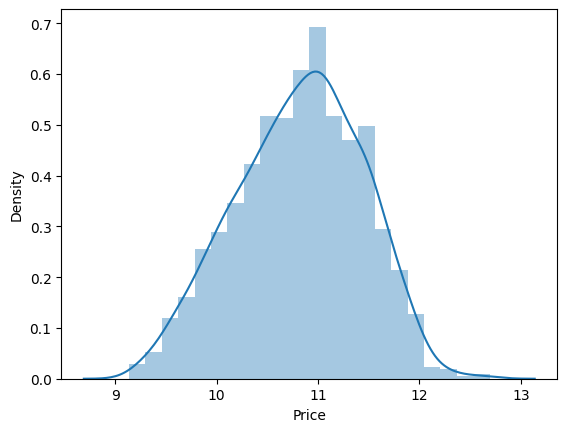

In [80]:
sns.distplot(np.log(df['Price']))

In [81]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Cpu               1303 non-null   object 
 3   Ram               1303 non-null   int32  
 4   Gpu               1303 non-null   object 
 5   OpSys             1303 non-null   object 
 6   Weight            1303 non-null   float64
 7   Price             1303 non-null   float64
 8   IPS Panel         1303 non-null   int64  
 9   Touchscreen       1303 non-null   int64  
 10  price per inches  1303 non-null   float64
 11  SSD               1303 non-null   int64  
 12  HDD               1303 non-null   int64  
dtypes: float64(3), int32(1), int64(4), object(5)
memory usage: 127.4+ KB


In [83]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [84]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.20, random_state=100)

In [85]:
print(X_train.shape)
print(X_test.shape)

(1042, 12)
(261, 12)


In [86]:
y_train.shape

(1042,)

In [87]:
X_train

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,IPS Panel,Touchscreen,price per inches,SSD,HDD
1198,Acer,Notebook,other Intel Processer,4,Intel_Graphics,Other_opsys,2.10,0,0,100.454670,0,1000
114,Dell,Ultrabook,Intel Core i5,8,Intel_Graphics,Windows,1.21,1,0,165.632118,256,0
493,Acer,Notebook,AMD Processer,8,AMD_Graphics,Windows,2.20,0,0,100.454670,0,1000
800,HP,Workstation,Intel Core i7,8,Other_Graphics,Windows,3.14,0,0,141.211998,256,0
1062,Dell,Notebook,Intel Core i5,4,Intel_Graphics,Windows,2.25,0,0,141.211998,0,1000
...,...,...,...,...,...,...,...,...,...,...,...,...
802,Dell,Ultrabook,Intel Core i5,8,Intel_Graphics,Windows,1.29,0,0,165.632118,256,0
53,HP,Notebook,Intel Core i7,8,Intel_Graphics,Windows,1.49,0,0,165.632118,512,0
350,Dell,Notebook,Intel Core i7,16,Other_Graphics,Windows,2.06,0,1,138.461776,512,0
79,HP,Notebook,Intel Core i5,8,Other_Graphics,Windows,2.50,0,0,127.335675,128,1000


In [88]:
make_column=make_column_transformer(
     (OneHotEncoder(sparse_output = False,handle_unknown='ignore',categories='auto'),['Company','TypeName','Cpu','Gpu','OpSys']),
     (StandardScaler(),['Ram','Weight','IPS Panel','Touchscreen','price per inches','SSD','HDD']),
     remainder='passthrough')

In [89]:
make_column

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['Company', 'TypeName', 'Cpu', 'Gpu',
                                  'OpSys']),
                                ('standardscaler', StandardScaler(),
                                 ['Ram', 'Weight', 'IPS Panel', 'Touchscreen',
                                  'price per inches', 'SSD', 'HDD'])])

In [90]:
# scaller=StandardScaler(with_mean=False)

In [91]:
regressor=LinearRegression()

In [92]:
pipe=make_pipeline(make_column,regressor)

In [93]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Company', 'TypeName', 'Cpu',
                                                   'Gpu', 'OpSys']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['Ram', 'Weight', 'IPS Panel',
                                                   'Touchscreen',
                                                   'price per inches', 'SSD',
                                                   'HDD'])])),
                ('linearregression', LinearRegression())])

In [94]:
predict_value = pipe.predict(X_test)

In [95]:
r2_score(y_test,predict_value) 

0.8163369178234499

In [96]:
make_column=make_column_transformer((OneHotEncoder(handle_unknown='ignore',categories='auto'),['Company','TypeName','Cpu','Gpu','OpSys']),remainder='passthrough')

from sklearn.linear_model import Ridge
ridge = Ridge()

pipe = make_pipeline(make_column, ridge)

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)
print(r2_score(y_pred, y_test))

0.7826354888146831


In [97]:
make_column=make_column_transformer((OneHotEncoder(handle_unknown='ignore',categories='auto'),['Company','TypeName','Cpu','Gpu','OpSys']),remainder='passthrough')

from sklearn.linear_model import Lasso
lasso = Lasso()

pipe = make_pipeline(make_column, lasso)

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)
print(r2_score(y_pred, y_test))

0.056080571241757804


In [98]:
df.sample(3)

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,IPS Panel,Touchscreen,price per inches,SSD,HDD
920,Dell,Notebook,Intel Core i5,4,AMD_Graphics,Windows,2.18,36496.2672,0,0,100.454670,0,1000
414,Asus,2 in 1 Convertible,Intel Core i5,8,Intel_Graphics,Windows,1.27,49443.8400,1,1,165.632118,256,0
542,HP,Ultrabook,Intel Core i7,8,Intel_Graphics,Windows,1.34,61005.6000,1,0,276.053530,256,0


In [99]:
df.head(5)

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,IPS Panel,Touchscreen,price per inches,SSD,HDD
0,Apple,Ultrabook,Intel Core i5,8,Intel_Graphics,MacOS,1.37,71378.6832,1,0,226.983005,128,0
1,Apple,Ultrabook,Intel Core i5,8,Intel_Graphics,MacOS,1.34,47895.5232,0,0,127.677940,0,0
2,HP,Notebook,Intel Core i5,8,Intel_Graphics,Other_opsys,1.86,30636.0000,0,0,141.211998,256,0
3,Apple,Ultrabook,Intel Core i7,16,AMD_Graphics,MacOS,1.83,135195.3360,1,0,220.534624,512,0
4,Apple,Ultrabook,Intel Core i5,8,Intel_Graphics,MacOS,1.37,96095.8080,1,0,226.983005,256,0


In [100]:
import pickle

In [101]:
pickle.dump(df,open("df.pkl","wb"))

In [102]:
pickle.dump(pipe,open("pipe.pkl","wb"))

In [103]:
df.columns

Index(['Company', 'TypeName', 'Cpu', 'Ram', 'Gpu', 'OpSys', 'Weight', 'Price',
       'IPS Panel', 'Touchscreen', 'price per inches', 'SSD', 'HDD'],
      dtype='object')

In [104]:
X_train.columns

Index(['Company', 'TypeName', 'Cpu', 'Ram', 'Gpu', 'OpSys', 'Weight',
       'IPS Panel', 'Touchscreen', 'price per inches', 'SSD', 'HDD'],
      dtype='object')

In [105]:
df.iloc[145,:]

Company                       Asus
TypeName                 Ultrabook
Cpu                  Intel Core i7
Ram                              8
Gpu                 Intel_Graphics
OpSys                      Windows
Weight                        1.25
Price                     58554.72
IPS Panel                        0
Touchscreen                      0
price per inches        157.350512
SSD                            256
HDD                              0
Name: 145, dtype: object

In [109]:
X_test.sample(5)

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,IPS Panel,Touchscreen,price per inches,SSD,HDD
169,HP,Notebook,Intel Core i5,4,Intel_Graphics,Windows,1.49,1,0,165.632118,0,500
342,HP,Notebook,Intel Core i3,8,Other_Graphics,Windows,2.10,1,0,141.211998,0,1000
97,Dell,Notebook,Intel Core i3,4,AMD_Graphics,Other_opsys,2.20,0,0,141.211998,256,0
772,Toshiba,Notebook,Intel Core i5,4,Intel_Graphics,Windows,1.75,1,0,111.935204,128,0
118,Asus,Notebook,Intel Core i3,4,Other_Graphics,Windows,2.00,0,0,127.335675,0,1000


In [108]:
y_test.sample(5)

1234    10.841452
552     11.876198
1250     9.756305
713      9.672655
118     10.310615
Name: Price, dtype: float64